<a href="https://colab.research.google.com/github/it22258380/Robotics-and-intelligent-system/blob/main/hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

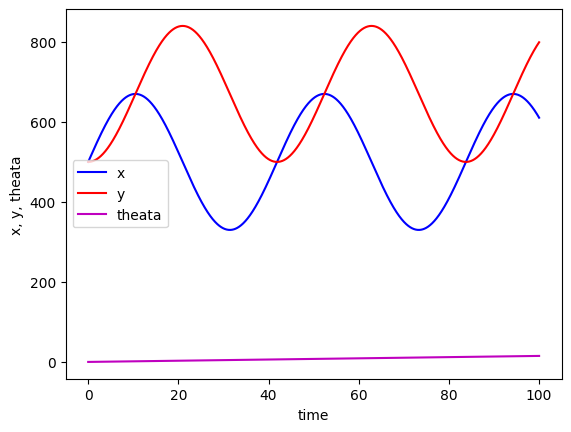

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# define the robot parameter
r = 15 #Radius of the wheel
s = 4 * r #distance between the wheel centers

# time vector
timeVector = np.linspace(0, 100, 10000)

# define Angular velocity for the wheels
DeltaL = 2*np.ones(timeVector.shape) #Left wheel angular velocity
DeltaR = 1.4*np.ones(timeVector.shape) #Right wheel angular velocity

# pos [0] = x, pos[1] = y, pos[2] = theata
def diffModel(pos, t, timePoints, sC, rC, DeltaL_Array, DeltaR_Array):
    # Value of the Delta L at the current time t
    DeltaL_t = np.interp(t, timePoints, DeltaL_Array)
    # Value of the Delta R at the current time t
    DeltaR_t = np.interp(t, timePoints, DeltaR_Array)

    # x_dot
    x_dot = (0.5*rC*np.cos(pos[2])) * (DeltaL_t + DeltaR_t)
    # y_dot
    y_dot = (0.5*rC*np.sin(pos[2])) * (DeltaL_t + DeltaR_t)
    # theata_dot
    theata_dot = (rC/sC) * ((DeltaL_t) + (-DeltaR_t))

    zeta = [x_dot, y_dot, theata_dot]
    return zeta
# define the initial values for the simulation
#x, y, theata
initialState = np.array([500, 500, 0])

solutionArray = odeint(diffModel, initialState, timeVector, args=(timeVector, s, r, DeltaL, DeltaR))

np.save('simulationData.npy', solutionArray)

# plot the results
plt.plot(timeVector, solutionArray[:,0], 'b', label = 'x')
plt.plot(timeVector, solutionArray[:,1], 'r', label = 'y')
plt.plot(timeVector, solutionArray[:,2], 'm', label = 'theata')
plt.xlabel('time')
plt.ylabel('x, y, theata')
plt.legend()
plt.show()